In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

plt.style.use("/home/mchristo/proj/libmsc/style/msc.mplstyle")

## Version 2

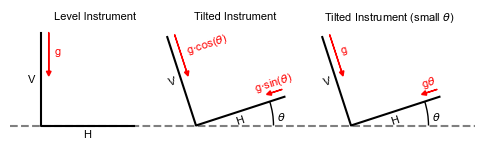

In [2]:
fig = plt.figure(figsize=(6, 2))
ax = plt.gca()
ax.axis("off")

# Shared parameters
s_linewidth = 1.5  # sensor axis line width
g_headwidth = 0.03  # gravity vector head width
g_headlength = 0.03  # gravity vector head length
g_long = 0.25  # v axis gravirty vector
g_short = 0.075  # h axis gravity vector
g_offset = 0.05  # Offset of gravity vectors from respective axis
t_offset = 0.06 # Text label offset
t_font = 8  # font size
s_length = 0.6  # sensitive axis length
x_offset = 0.2 # offset for axes
y_offset = 0.1 # offset for axes
x_theta = 0.75 # theta label x coordinate
y_theta = 0.16 # theta label y coordinate
x_label = 0.05 # panel label x coordinate
y_label = 0.8 # panel label y coordinate
label_tilt_nudge = 0.1 # x direction label nudge for tilted panels
g_color = "r"

# Set plot limts
ax.set(xlim=(0, 3), ylim=(0, 0.75))

# Draw dashed line accross whole plot
ax.axhline(.1, linestyle="--", alpha=0.5)

# Level axes
xs = np.array([0, 0, s_length])
ys = np.array([s_length, 0, 0])

# Rotated axes
theta = np.radians(18)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
xsrysr = R@np.vstack((xs,ys))
xsr = xsrysr[0,:]
ysr = xsrysr[1,:]

# Apply offset
xs += x_offset
ys += y_offset
xsr += x_offset
ysr += y_offset


### Plot level axes ###
ax.plot(xs, ys, linewidth=s_linewidth)

# Vertical axis gravity acceleration
ax.arrow(xs[0]+g_offset, ys[0], 0, -g_long, length_includes_head=False, head_width=g_headwidth, head_length=g_headlength, color=g_color)

# Labels
ax.text(xs[0]-t_offset, (ys[0]+ys[1])/2, "V", fontsize=t_font, va="center", ha="center")
ax.text((xs[1]+xs[2])/2, ys[1]-t_offset, "H", fontsize=t_font, va="center", ha="center")
ax.text(xs[0]+g_offset+t_offset, ys[0]-g_long/2, "g", fontsize=t_font, va="center", ha="center", color=g_color)
alabel = ax.text(x_label, y_label, "a", fontsize=t_font, va="center", ha="center")



### Plot rotated axes ###
ax.plot(xsr+1, ysr, "k-", linewidth=s_linewidth)

# Arc for angle
e0 = mpl.patches.Arc((xsr[1]+1, ysr[1]), 1, 1, theta1=0, theta2=np.degrees(theta))
ax.add_patch(e0)

# Vertical axis gravity acceleration
ax.arrow(xsr[0]+(g_offset*np.cos(theta))+1, ysr[0]+(g_offset*np.sin(theta)), g_long*np.sin(theta), -g_long*np.cos(theta), length_includes_head=False, head_width=g_headwidth, head_length=g_headlength, color=g_color)
# Horitontal axis gravity acceleration
ax.arrow(xsr[2]-(g_offset*np.sin(theta))+1, ysr[2]+(g_offset*np.cos(theta)), -g_short*np.cos(theta), -g_short*np.sin(theta), length_includes_head=False, head_width=g_headwidth, head_length=g_headlength, color=g_color)

# Labels
ax.text((xsr[0]+xsr[1])/2-t_offset+1, (ysr[0]+ysr[1])/2, "V", fontsize=t_font, va="center", ha="center", rotation=np.degrees(theta))
ax.text((xsr[1]+xsr[2])/2+1, (ysr[1]+ysr[2])/2-t_offset, "H", fontsize=t_font, va="center", ha="center", rotation=np.degrees(theta))

gxgy = R@np.array([[g_offset+t_offset],
                   [s_length-g_long/2]])
nudge = 0.12
nx = np.cos(theta)*nudge
ny = np.sin(theta)*nudge
ax.text(gxgy[0]+x_offset+1+nx, gxgy[1]+y_offset+ny, "g$\\cdot$cos($\\theta$)", fontsize=t_font, va="center", ha="center", rotation=np.degrees(theta), color=g_color)

gxgy = R@np.array([[s_length-g_short/2],
                   [g_offset+t_offset]])
ax.text(gxgy[0]+x_offset+1, gxgy[1]+y_offset, "g$\\cdot$sin($\\theta$)", fontsize=t_font, va="center", ha="center", rotation=np.degrees(theta), color=g_color)

ax.text(x_theta+1, y_theta, "$\\theta$", fontsize=t_font, va="center", ha="center")
blabel = ax.text(x_label+1-label_tilt_nudge, y_label, "b", fontsize=t_font, va="center", ha="center")




### Plot rotated axes small angle approx ###
ax.plot(xsr+2, ysr, "k-", linewidth=s_linewidth)

# Arc for angle
e1 = mpl.patches.Arc((xsr[1]+2, ysr[1]), 1, 1, theta1=0, theta2=np.degrees(theta))
ax.add_patch(e1)

# Vertical axis gravity acceleration
ax.arrow(xsr[0]+(g_offset*np.cos(theta))+2, ysr[0]+(g_offset*np.sin(theta)), g_long*np.sin(theta), -g_long*np.cos(theta), length_includes_head=False, head_width=g_headwidth, head_length=g_headlength, color=g_color)
# Horitontal axis gravity acceleration
ax.arrow(xsr[2]-(g_offset*np.sin(theta))+2, ysr[2]+(g_offset*np.cos(theta)), -g_short*np.cos(theta), -g_short*np.sin(theta), length_includes_head=False, head_width=g_headwidth, head_length=g_headlength, color=g_color)

# Labels
ax.text((xsr[0]+xsr[1])/2-t_offset+2, (ysr[0]+ysr[1])/2, "V", fontsize=t_font, va="center", ha="center", rotation=np.degrees(theta))
ax.text((xsr[1]+xsr[2])/2+2, (ysr[1]+ysr[2])/2-t_offset, "H", fontsize=t_font, va="center", ha="center", rotation=np.degrees(theta))

gxgy = R@np.array([[g_offset+t_offset],
                   [s_length-g_long/2]])

ax.text(gxgy[0]+x_offset+2, gxgy[1]+y_offset, "g", fontsize=t_font, va="center", ha="center", rotation=np.degrees(theta), color=g_color)

gxgy = R@np.array([[s_length-g_short/2],
                   [g_offset+t_offset]])
ax.text(gxgy[0]+x_offset+2, gxgy[1]+y_offset, "g$\\theta$", fontsize=t_font, va="center", ha="center", rotation=np.degrees(theta), color=g_color)

ax.text(x_theta+2, y_theta, "$\\theta$", fontsize=t_font, va="center", ha="center")
clabel = ax.text(x_label+2-label_tilt_nudge, y_label, "c", fontsize=t_font, va="center", ha="center")


ax.set_aspect(1)
fig.savefig("figs/tilt_diagram.pdf", bbox_inches="tight")

# For presentation
alabel.remove()
blabel.remove()
clabel.remove()


clabel = ax.text(x_label+0.6-label_tilt_nudge, y_label, "Level Instrument", fontsize=t_font, va="center", ha="center")
clabel = ax.text(x_label+1.5-label_tilt_nudge, y_label, "Tilted Instrument", fontsize=t_font, va="center", ha="center")
clabel = ax.text(x_label+2.5-label_tilt_nudge, y_label, "Tilted Instrument (small $\\theta$)", fontsize=t_font, va="center", ha="center")

fig.savefig("figs/png/tilt_diagram.png", dpi=300, bbox_inches="tight")

## Version 1

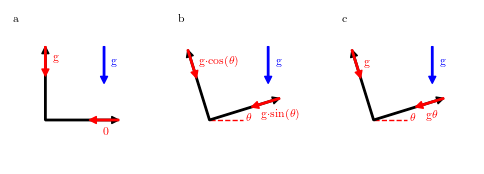

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(6, 2))

awidth = 1
aheadwidth = 5
aheadlength = 5
hs = np.array([1, 0])
vs = np.array([0, 1])
origin = np.array([0, 0])

hg = np.array([-.4, 0])
vg = np.array([0, -.4])

g = np.array([0, -.5])
gorigin = np.array([0.8, 1.0])

xoff = np.array([.1, 0])
yoff = np.array([0, .1])

axs[0].axis("off")
axs[0].axis("equal")

# Sensing vectors
axs[0].annotate("", xy=origin+vs, xytext=origin, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="k"))
axs[0].annotate("", xy=origin+hs, xytext=origin, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="k"))

# Gravity vectors
axs[0].annotate("", xy=gorigin+g, xytext=gorigin, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="b"))
axs[0].annotate("", xy=origin+vs+vg, xytext=origin+vs, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="r"))
axs[0].annotate("", xy=origin+hs+hg, xytext=origin+hs, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="r"))

# Gravity vector labels
axs[0].annotate("g", xy=gorigin+(g/2)+xoff, color="b")
axs[0].annotate("g", xy=origin+vs+(vg/2)+(xoff*1), color="r")
axs[0].annotate("0", xy=origin+hs+(hg/1.9)-(yoff*2), color="r")

# Label
axs[0].annotate(
    "a",
    (.025,.925),
    xycoords="axes fraction",
)
axs[0].set_xlim(-.6, 1.5)
axs[0].set_ylim(-.6, 1.5)


###############

theta = .3
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

hs = R@np.array([1, 0])
vs = R@np.array([0, 1])
origin = np.array([0, 0])

hg = R@np.array([-.4, 0])
vg = R@np.array([0, -.4])

xoff = np.array([.1, 0])
yoff = np.array([0, .1])

axs[1].axis("off")
axs[1].axis("equal")

# Sensing vectors
axs[1].annotate("", xy=origin+vs, xytext=origin, arrowprops=dict(width=awidth, headlength=aheadlength, headwidth=aheadwidth, color="k"))
axs[1].annotate("", xy=origin+hs, xytext=origin, arrowprops=dict(width=awidth, headlength=aheadlength, headwidth=aheadwidth, color="k"))

# Gravity vectors
axs[1].annotate("", xy=gorigin+g, xytext=gorigin, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="b"))
axs[1].annotate("", xy=origin+vs+vg, xytext=origin+vs, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="r"))
axs[1].annotate("", xy=origin+hs+hg, xytext=origin+hs, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="r"))

# Gravity vector labels
axs[1].annotate("g", xy=gorigin+(g/2)+xoff, color="b")
axs[1].annotate("g$\\cdot$cos($\\theta$)", xy=origin+vs+(vg/2)+(xoff*1), color="r")
axs[1].annotate("g$\\cdot$sin($\\theta$)", xy=origin+hs+(hg/1.1)-(yoff*1.5)+(xoff), color="r")

# Theta
axs[1].plot((0, .45), (0, 0), linestyle="--", linewidth=1, color="r")
axs[1].annotate("$\\theta$", xy=(0.5,-.02), color="r")

# Label
axs[1].annotate(
    "b",
    (.025,.925),
    xycoords="axes fraction",
)
axs[1].set_xlim(-.6, 1.5)
axs[1].set_ylim(-.6, 1.5)


######################################

theta = .3
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

hs = R@np.array([1, 0])
vs = R@np.array([0, 1])
origin = np.array([0, 0])

hg = R@np.array([-.4, 0])
vg = R@np.array([0, -.4])

xoff = np.array([.1, 0])
yoff = np.array([0, .1])

axs[2].axis("off")
axs[2].axis("equal")

# Sensing vectors
axs[2].annotate("", xy=origin+vs, xytext=origin, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="k"))
axs[2].annotate("", xy=origin+hs, xytext=origin, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="k"))

# Gravity vectors
axs[2].annotate("", xy=gorigin+g, xytext=gorigin, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="b"))
axs[2].annotate("", xy=origin+vs+vg, xytext=origin+vs, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="r"))
axs[2].annotate("", xy=origin+hs+hg, xytext=origin+hs, arrowprops=dict(width=awidth, headwidth=aheadwidth, headlength=aheadlength, color="r"))

# Gravity vector labels
axs[2].annotate("g", xy=gorigin+(g/2)+xoff, color="b")
axs[2].annotate("g", xy=origin+vs+(vg/1.8)+xoff, color="r")
axs[2].annotate("g$\\theta$", xy=origin+hs+(hg/1.6)-(yoff*2), color="r")

# Theta
axs[2].plot((0, .45), (0, 0), linestyle="--", linewidth=1, color="r")
axs[2].annotate("$\\theta$", xy=(0.5,-.02), color="r")

# Label
axs[2].annotate(
    "c",
    (.025,.925),
    xycoords="axes fraction",
)
axs[2].set_xlim(-.6, 1.5)
axs[2].set_ylim(-.6, 1.5)

plt.savefig("figs/tilt_diagram.pdf", bbox_inches="tight")